# このテキストについて
## テキストの目的
- 教師あり学習（分類問題）の概観を知る
- scikit-laernを使い分類を行えるようにする
- 手法の簡単な比較をする
<br><br>

## どのように学ぶか
定番のデータセットを通じて、分類問題を解く流れやライブラリの使い方を学びます。

**機械学習の大きな流れ**

（EDA→）前処理→学習→推定→評価（→可視化）

# アヤメの分類

Week3で使用したirisデータセットを使い、分類問題を解く練習をします。
<br>
irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。
<br>
- [Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [ris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)
<br>

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。
<br>
<br>
## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

# 分類問題の流れ

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。


この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。
<br><br>
### 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。



## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


- virgicolorとvirginica
- sepal_lengthとpetal_length
<br><br>

**《実際の問題では？》**


実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

### Import libraries

In [1]:
# Data manipulation library
import pandas as pd
import numpy as np

# Drawing llibrary
import matplotlib.pyplot as plt
import seaborn as sns

# dataset library for iris classification
from sklearn.datasets import load_iris

### Import dataset and extract dedicated columns

In [2]:
# import iris dataset
iris_data = load_iris()
# Extract .data data and set dedicated column names.
X = pd.DataFrame(iris_data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# Extract .target data and set 'target' column.
y = pd.DataFrame(iris_data.target, columns=['target'])
# Concatnate dataframe X and y. added as new column: axis=1, added as new rows: axis=2.
df = pd.concat([X, y], axis=1)

# Extract rows by .query method and columns by .loc method.
df_selected = df.query("target == [1, 2]").loc[:, ["sepal_length", "petal_length", "target"]]
df_selected.head()

,sepal_length,petal_length,target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

<br><br>
**《実際の問題では？》**

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

<br><br>
### 前処理
データに加工をしていきます。

#### EDA

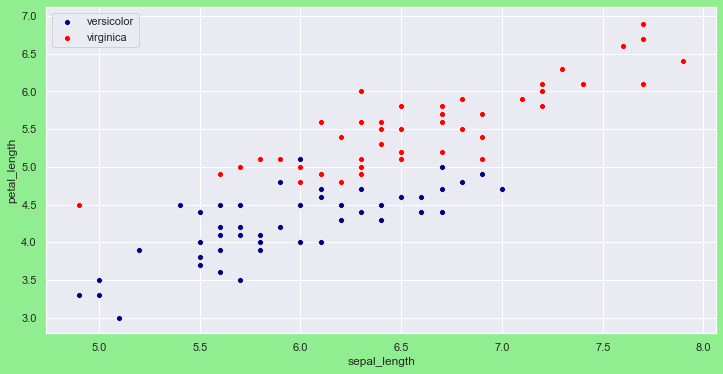

In [3]:
# Draw scatter
sns.set()
# Set figure size and facecolor.
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6), facecolor='lightgreen')
sns.scatterplot(ax=ax1, x=df_selected[df_selected.target==1].iloc[:, 0], y= df_selected[df_selected.target==1].iloc[:, 1],  label='versicolor', color='navy')
sns.scatterplot(ax=ax1, x=df_selected[df_selected.target==2].iloc[:, 0], y= df_selected[df_selected.target==2].iloc[:, 1],  label='virginica', color='red')

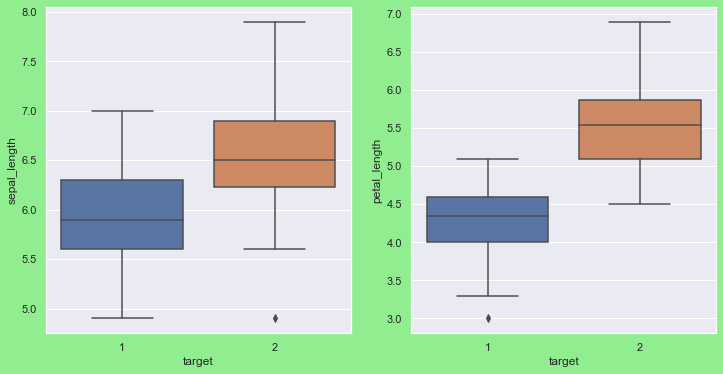

In [4]:
# Draw box plot
sns.set()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6), facecolor='lightgreen')
sns.boxplot(ax=ax1, x='target', y='sepal_length', data=df_selected)
sns.boxplot(x='target', y='petal_length', data=df_selected)

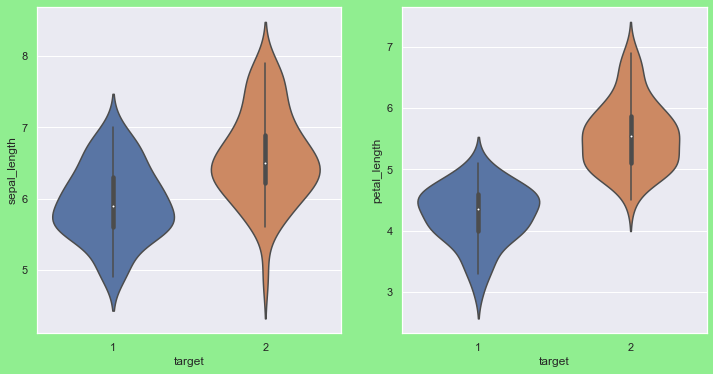

In [5]:
# Draw violin plot
sns.set()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6), facecolor='lightgreen')
sns.violinplot(ax=ax1, x='target', y='sepal_length', data=df_selected)
sns.violinplot(x='target', y='petal_length', data=df_selected)

## 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

<br><br>
**《注意点》**


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

<br><br>
**《分割する理由》**


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。



### Preprocessing

#### Split dataframe to train and test (truth) data

In [6]:
# import splitting method
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.loc[:, "target"], test_size=0.25, random_state=42)
print("X_train.shape : {}, X_test.shape : {}".format(X_train.shape, X_test.shape))

X_train.shape : (75, 2), X_test.shape : (25, 2)


## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

<br><br>
**《注意点》**


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

<br><br>
**《実際の問題での前処理は？》**


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

#### Standardization

In [7]:
#import standardization model
from sklearn.preprocessing import StandardScaler

# Instantiate the model and make the methods in the model available.
scaler = StandardScaler()

# Standardization train data by .fit
scaler.fit(X_train)

# Standardization train and test data by .transform
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。


[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。
<br><br>

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

#### Learning, Estimate

##### K Nearest Neighbors

In [8]:
# import K neighbors classifier model
from sklearn.neighbors import KNeighborsClassifier
# import metrics model
from sklearn import metrics

def knn(k):
    # モデルに引数を渡してインスタンス化する
    neigh = KNeighborsClassifier(n_neighbors=k)
    # 学習する
    neigh.fit(X_train_transformed, y_train)
    # 推定する
    y_pred = neigh.predict(X_test_transformed)
    print("{}-nnの推定結果：{}".format(k, y_pred))
    return neigh, y_pred

In [9]:
neigh1, y_pred_neigh1 = knn(1)
neigh3, y_pred_neigh3 = knn(3)
neigh5, y_pred_neigh5 = knn(5)

1-nnの推定結果：[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
3-nnの推定結果：[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
5-nnの推定結果：[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


## 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる
<br><br>
- [sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

**scikit-learnを使い4種類の指標を計算する**<br>
**混同行列をscikit-learnを使い表示する**

#### Evaluation

In [10]:
 # 評価する
def evaluate(y_true, y_pred):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)    
    return acc, precision, recall, f1, confusion

In [11]:
print("1-nn")
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred_neigh1)))
print("------")

print("3-nn")
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred_neigh3)))
print("------")

print("5-nn")
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred_neigh5)))

1-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
------
3-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
------
5-nn
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


**memo**

format(*evaluate(y_train, y_pred_neigh_3)とアスタリスクを付けていますが、これはtupleで返ってきた値を アンパック してformatメソッドに渡しています。

formatメソッドは 可変長引数 として表示したい値を受け取るので、これに適した形にするためです。

もしもアスタリスクを付けないと以下のようなエラーとなります。これは 5種類の値をまとめて1つのtupleとしてformatメソッドに渡している ため、値の数が足りないというエラーになっています。

- Accuracy（正解率）
 - 全予測正答
 - 全予測に対する正答率
 $$\frac{TP+TN}{TP+FP+FN+TN}$$
- Precision（適合率）
 - 正予測の正答率
 - 正と予測したデータのうち，実際に正であるものの割合。
$$\frac{TP}{TP+FP}$$
- Recall（再現率）
 - 正に対する正答率
 - 実際に正であるもののうち，正であると予測されたものの割合
 $$\frac{TP}{TP+FN}$$
- F値
 - 適合率と再現率の調和平均
$$\frac{2×Precision×Recall}{Precision+Recall}$$

<br>**Reference**<br>
[【入門者向け】機械学習の分類問題評価指標解説(正解率・適合率・再現率など)](https://qiita.com/FukuharaYohei/items/be89a99c53586fa4e2e4)

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

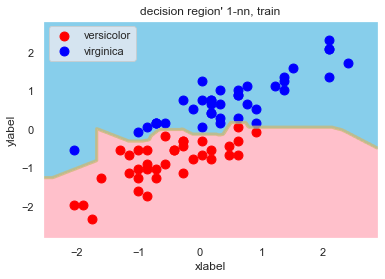

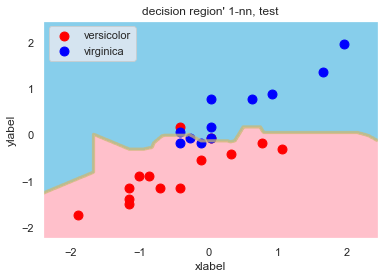

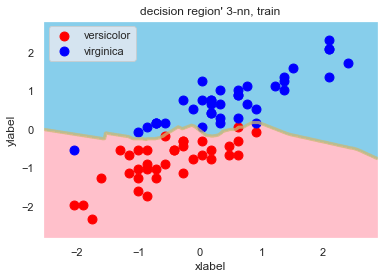

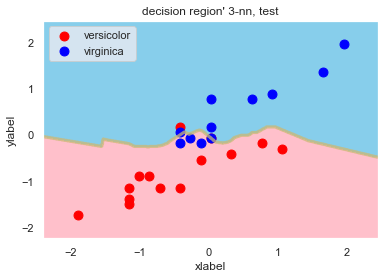

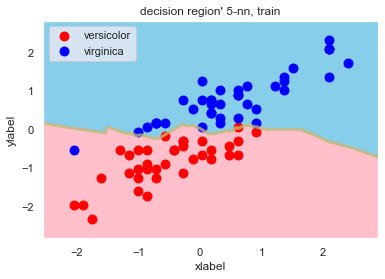

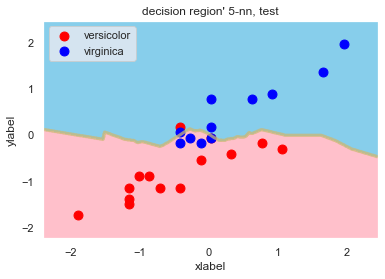

In [13]:
#　問５で作成したモデルを変数に格納
models = [neigh1, neigh3, neigh5]
# プロットのタイトルを変数に格納
model_names = ["1-nn", "3-nn", "5-nn"]

# 可視化
for model, model_name in zip(models, model_names):
    decision_region(X_train_transformed, y_train, model, title="decision region' {}, {}".format(model_name, "train"))
    decision_region(X_test_transformed, y_test, model, title="decision region' {}, {}".format(model_name, "test"))

3-nnの決定領域を表示した例が以下です。

<br>
この例では訓練データをプロットし、どのように学習したかを見ています。一方で、検証データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。
<br><br>

### 手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません

# 各手法の比較
## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。


- [sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

<br><br>
**《実際の問題では？》**
<br>
ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

**最近傍法**

1-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]


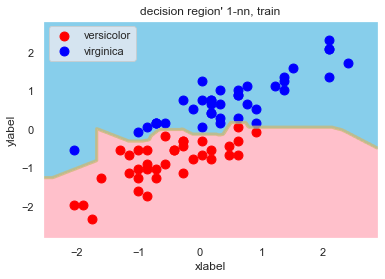

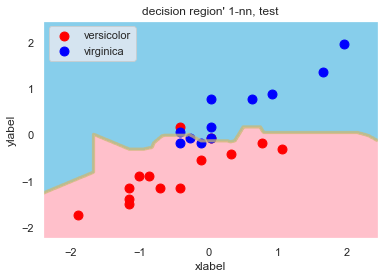

3-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]


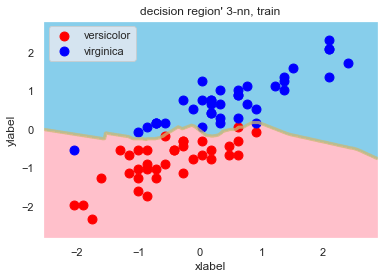

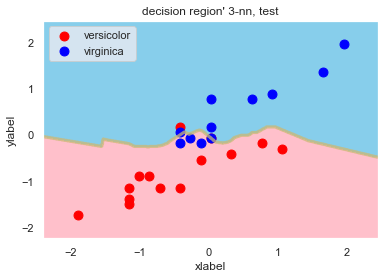

5-nn
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


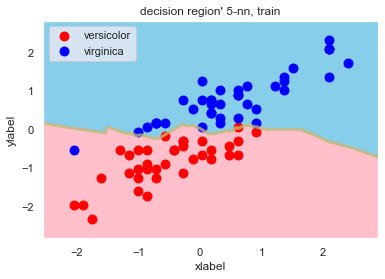

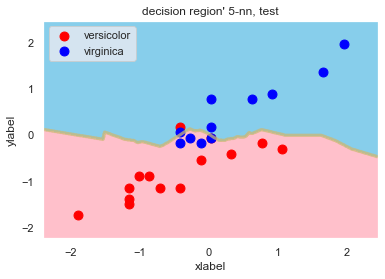

Logistic Regression
acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
confusion matrix 
 [[13  1]
 [ 3  8]]


/Users/akihiro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


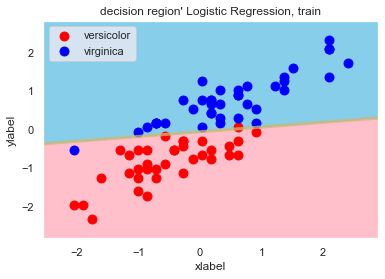

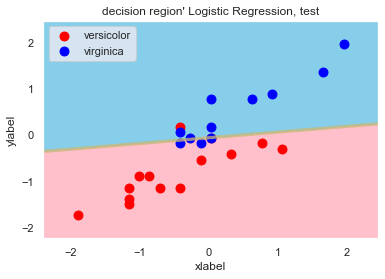

SVM
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
confusion matrix 
 [[12  2]
 [ 2  9]]


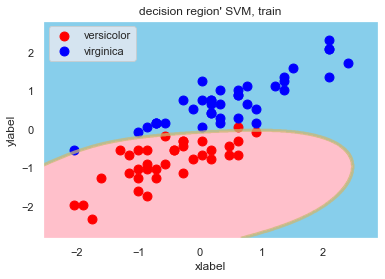

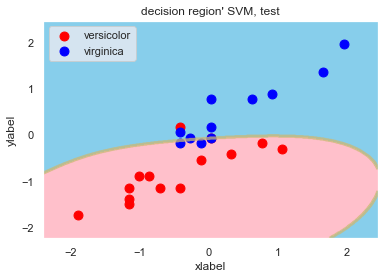

Decision Tree
acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
confusion matrix 
 [[13  1]
 [ 3  8]]


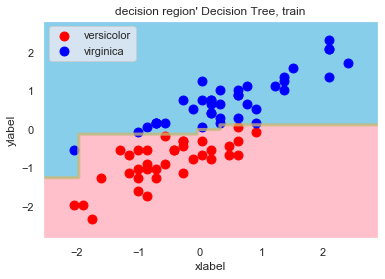

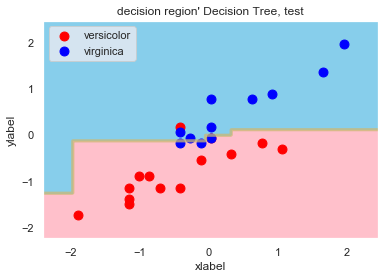

Random Forest
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


/Users/akihiro/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


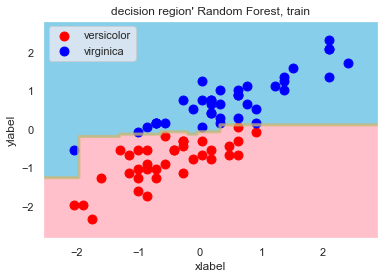

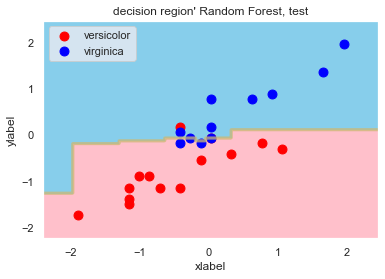

In [14]:
# sklearnのから各種モデルをimportする
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# importしたモデルをインスタンス化
# ロジスティック回帰
logistic_reg = LogisticRegression()
# サポートベクターマシーン
svc = SVC()
# 決定木
tree = DecisionTreeClassifier()
# ランダムフォレスト
random_forest = RandomForestClassifier()

# 可視化
models = [neigh1, neigh3, neigh5, logistic_reg, svc, tree, random_forest]
model_names = ["1-nn", "3-nn", "5-nn", "Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
for model, model_name in zip(models, model_names):
    print(model_name)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))
    decision_region(X_train_transformed, y_train, model, title="decision region' {}, {}".format(model_name, "train"))
    decision_region(X_test_transformed, y_test, model, title="decision region' {}, {}".format(model_name, "test"))

## 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


<br><br>
**《多値になることでの変更点》**


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。


決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。
<br><br>
ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。